In [ ]:
DATASET 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#per visualizzare due cifre
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df = pd.read_csv("competitor1.csv")
print("Dimensione dataset \n", df.shape, "\n")

Dimensione dataset 
 (367, 12) 



In [ ]:
print("Parte iniziale del dataset \n",df.head(21), "\n")

Parte iniziale del dataset 
           date project_id  expected_inflow  actual_inflow  expected_outflow  \
0   2022-01-28      PJT_A        802737.87      349937.56        1005735.84   
1   2022-03-27      PJT_A       1274729.03           0.00         569882.92   
2   2022-05-06      PJT_A        818083.51      275585.62        1507023.64   
3   2022-12-09      PJT_A       1207020.34           0.00         512367.63   
4   2023-03-01      PJT_A        544394.85     1314727.50         213769.84   
5   2023-03-02      PJT_A             0.00       99522.84         410749.85   
6   2023-03-27      PJT_A        742690.43           0.00              0.00   
7   2023-04-17      PJT_A        349698.06       21234.83         747809.64   
8   2023-04-30      PJT_A             0.00           0.00              0.00   
9   2023-05-08      PJT_A        435860.97           0.00         494003.80   
10  2023-05-12      PJT_A             0.00           0.00         728074.65   
11  2023-06-13      PJT

In [ ]:
df.describe()

,expected_inflow,actual_inflow,expected_outflow,actual_outflow,opening_cash,closing_cash,net_cash_flow,net_cash_flow_lag1,rolling_net_7,rolling_outflow_30
count,367.00,367.00,367.00,367.00,367.00,367.00,367.00,363.00,367.00,367.00
mean,198543.20,97592.11,238064.55,108943.14,102143.11,90792.07,-11351.03,-11636.33,-20308.42,135279.08
std,231302.86,197370.84,214268.40,171552.93,231397.22,190856.45,126851.57,127440.65,81548.85,108642.72
min,0.00,0.00,0.00,0.00,0.00,0.00,-1017921.45,-1017921.45,-634964.93,47367.29
25%,0.00,0.00,81325.79,51.31,3.31,2.96,-27829.19,-28044.93,-14646.89,82315.58
50%,157280.20,0.00,202663.81,27005.45,3253.27,3140.62,-211.54,-211.54,-6.22,103131.12
75%,303252.86,114237.49,321681.05,159585.53,104599.92,99193.29,0.00,0.00,4030.66,133930.49
max,1274729.03,1314727.50,1507023.64,1293507.07,2264901.42,1749111.71,495582.07,495582.07,110449.98,865727.27


In [ ]:
print("Informazioni generali \n")
print(df.info())

Informazioni generali 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                367 non-null    object 
 1   project_id          367 non-null    object 
 2   expected_inflow     367 non-null    float64
 3   actual_inflow       367 non-null    float64
 4   expected_outflow    367 non-null    float64
 5   actual_outflow      367 non-null    float64
 6   opening_cash        367 non-null    float64
 7   closing_cash        367 non-null    float64
 8   net_cash_flow       367 non-null    float64
 9   net_cash_flow_lag1  363 non-null    float64
 10  rolling_net_7       367 non-null    float64
 11  rolling_outflow_30  367 non-null    float64
dtypes: float64(10), object(2)
memory usage: 34.5+ KB
None


In [ ]:
df_copy=df.copy()

In [ ]:
# Seleziona le colonne con dtype float64
float64_cols = df_copy.select_dtypes(include=['float64']).columns

# Cambia il dtype delle colonne selezionate a float32
df_copy[float64_cols] = df_copy[float64_cols].astype('float32')

# Verifica i tipi di dato aggiornati
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                367 non-null    object 
 1   project_id          367 non-null    object 
 2   expected_inflow     367 non-null    float32
 3   actual_inflow       367 non-null    float32
 4   expected_outflow    367 non-null    float32
 5   actual_outflow      367 non-null    float32
 6   opening_cash        367 non-null    float32
 7   closing_cash        367 non-null    float32
 8   net_cash_flow       367 non-null    float32
 9   net_cash_flow_lag1  363 non-null    float32
 10  rolling_net_7       367 non-null    float32
 11  rolling_outflow_30  367 non-null    float32
dtypes: float32(10), object(2)
memory usage: 20.2+ KB
None


In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')

In [ ]:
df_copy['project_id'] = df_copy['project_id'].astype('string').str.lower().astype('category')

In [ ]:
print("Parte iniziale del dataset \n",df_copy.head(21), "\n")


Parte iniziale del dataset 
          date project_id  expected_inflow  actual_inflow  expected_outflow  \
0  2022-01-28      pjt_a        802737.88      349937.56        1005735.81   
1  2022-03-27      pjt_a       1274729.00           0.00         569882.94   
2  2022-05-06      pjt_a        818083.50      275585.62        1507023.62   
3  2022-12-09      pjt_a       1207020.38           0.00         512367.62   
4  2023-03-01      pjt_a        544394.88     1314727.50         213769.84   
5  2023-03-02      pjt_a             0.00       99522.84         410749.84   
6  2023-03-27      pjt_a        742690.44           0.00              0.00   
7  2023-04-17      pjt_a        349698.06       21234.83         747809.62   
8  2023-04-30      pjt_a             0.00           0.00              0.00   
9  2023-05-08      pjt_a        435860.97           0.00         494003.81   
10 2023-05-12      pjt_a             0.00           0.00         728074.62   
11 2023-06-13      pjt_a           

In [ ]:
print("Colonne presenti nel dataset \n", df_copy.columns)
print("\n Tipo di ogni colonnea: \n", df_copy.dtypes)

Colonne presenti nel dataset 
 Index(['date', 'project_id', 'expected_inflow', 'actual_inflow',
       'expected_outflow', 'actual_outflow', 'opening_cash', 'closing_cash',
       'net_cash_flow', 'net_cash_flow_lag1', 'rolling_net_7',
       'rolling_outflow_30'],
      dtype='object')

 Tipo di ogni colonnea: 
 date                  datetime64[ns]
project_id                  category
expected_inflow              float32
actual_inflow                float32
expected_outflow             float32
actual_outflow               float32
opening_cash                 float32
closing_cash                 float32
net_cash_flow                float32
net_cash_flow_lag1           float32
rolling_net_7                float32
rolling_outflow_30           float32
dtype: object


In [ ]:
# Before optimization
original_memory = df.memory_usage(deep=True).sum()

# After optimizing columns (category, float32, datetime, etc.)
optimized_memory = df_copy.memory_usage(deep=True).sum()

# Print comparison
print(f"Original: {original_memory / 1024**2:.2f} MB")
print(f"Optimized: {optimized_memory / 1024**2:.2f} MB")
print(f"Reduction: {((original_memory - optimized_memory) / original_memory) * 100:.2f}%")

Original: 0.07 MB
Optimized: 0.02 MB
Reduction: 73.93%


In [ ]:
print("Valori nulli presenti \n", df_copy.isnull().sum())

Valori nulli presenti 
 date                  0
project_id            0
expected_inflow       0
actual_inflow         0
expected_outflow      0
actual_outflow        0
opening_cash          0
closing_cash          0
net_cash_flow         0
net_cash_flow_lag1    4
rolling_net_7         0
rolling_outflow_30    0
dtype: int64


In [ ]:
# Conta il numero di date duplicate nella colonna 'date'
num_duplicates = df_copy['date'].duplicated().sum()

if num_duplicates > 0:
    print(f"Ci sono {num_duplicates} date duplicate nella colonna 'date'.")
    # Puoi anche visualizzare le righe duplicate se necessario
    # display(df_copy[df_copy.duplicated(subset=['date'], keep=False)])
else:
    print("Non ci sono date duplicate nella colonna 'date'.")

Ci sono 47 date duplicate nella colonna 'date'.


In [ ]:
# Rimuovi i duplicati basandoti sulla colonna 'date'
df_no_duplicates = df_copy.drop_duplicates(subset=['date'], keep='first')

# Verifica la nuova dimensione del dataframe
print("Dimensione dataframe dopo la rimozione dei duplicati:", df_no_duplicates.shape)

Dimensione dataframe dopo la rimozione dei duplicati: (320, 12)


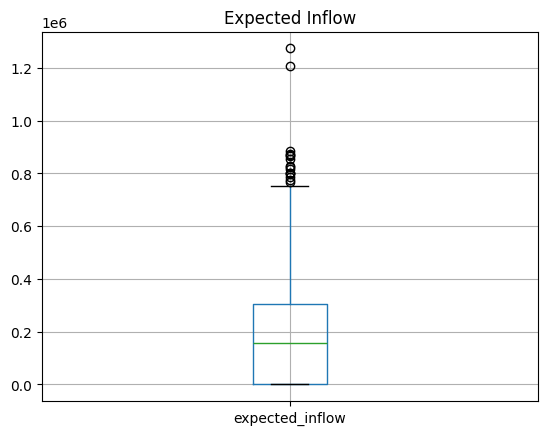

In [ ]:
boxplot = df_copy.boxplot(column=['expected_inflow'])
plt.title("Expected Inflow")
plt.show()
#100000 fino a 1.2 mil

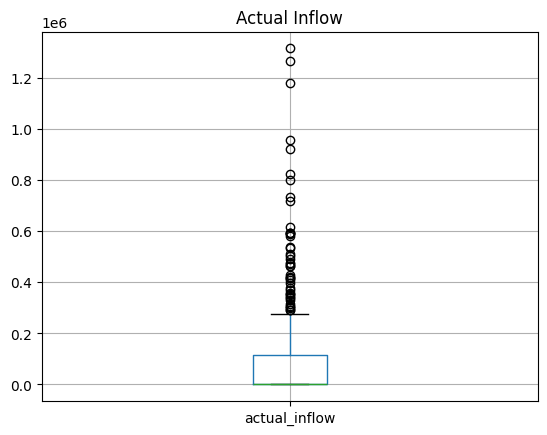

In [ ]:
boxplot = df_copy.boxplot(column=['actual_inflow'])
plt.title("Actual Inflow")
plt.show()

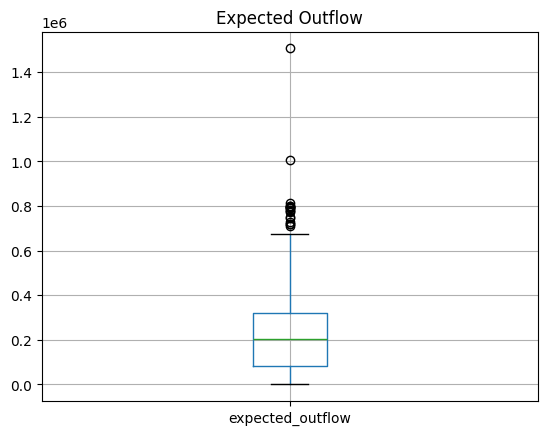

In [ ]:
boxplot = df_copy.boxplot(column=['expected_outflow'])
plt.title("Expected Outflow")
plt.show()

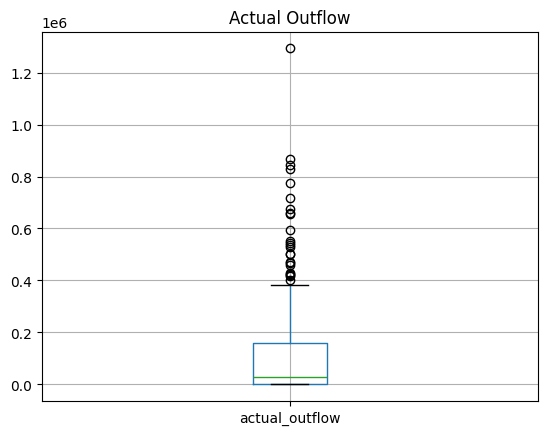

In [ ]:
boxplot = df_copy.boxplot(column=['actual_outflow'])
plt.title("Actual Outflow")
plt.show()

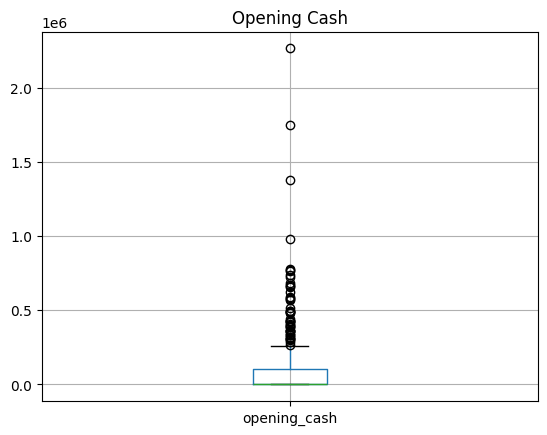

In [ ]:
boxplot = df_copy.boxplot(column=['opening_cash'])
plt.title("Opening Cash")
plt.show()

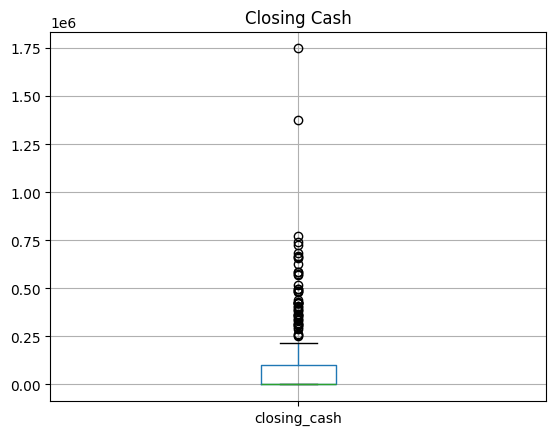

In [ ]:
boxplot = df_copy.boxplot(column=['closing_cash'])
plt.title("Closing Cash")
plt.show()

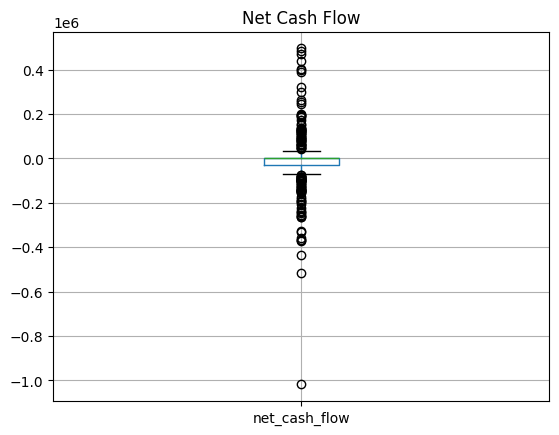

In [ ]:
boxplot = df_copy.boxplot(column=['net_cash_flow'])
plt.title("Net Cash Flow")
plt.show()

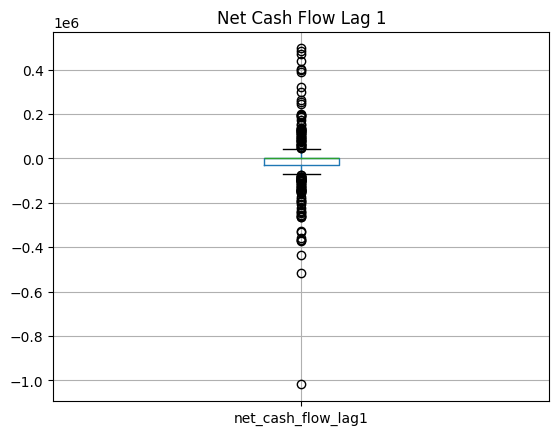

In [ ]:
boxplot = df_copy.boxplot(column=['net_cash_flow_lag1'])
plt.title("Net Cash Flow Lag 1")
plt.show()

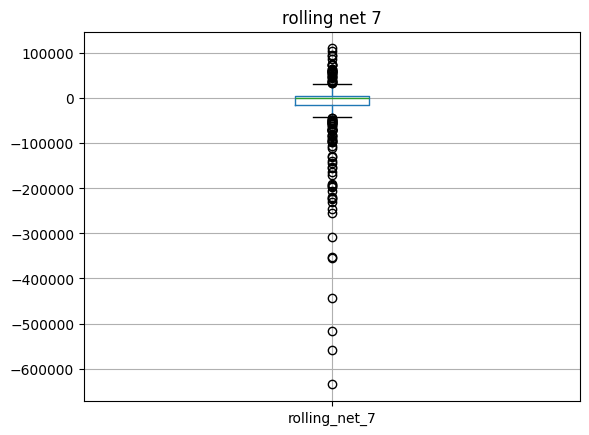

In [ ]:
boxplot = df_copy.boxplot(column=['rolling_net_7'])
plt.title("rolling net 7")
plt.show()

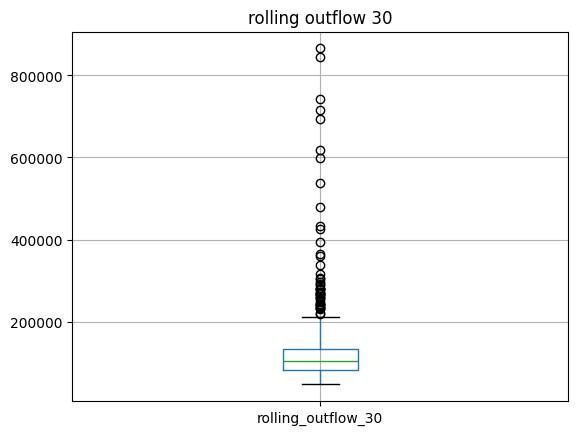

In [ ]:
boxplot = df_copy.boxplot(column=['rolling_outflow_30'])
plt.title("rolling outflow 30")
plt.show()

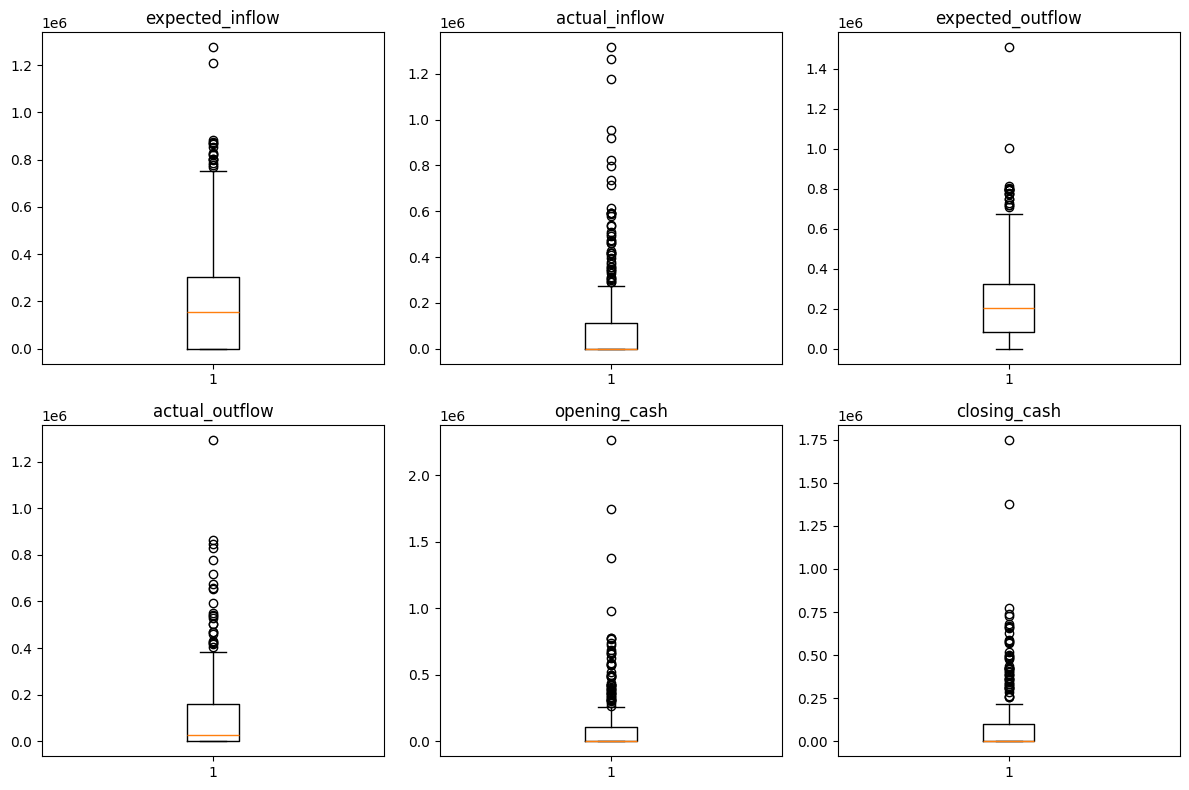

In [ ]:
#visualizzo tutti i boxplot insieme
df_subset = df_copy.iloc[:, 2:8]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(df_subset.columns):
    axes[i].boxplot(df_subset[col].dropna())
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

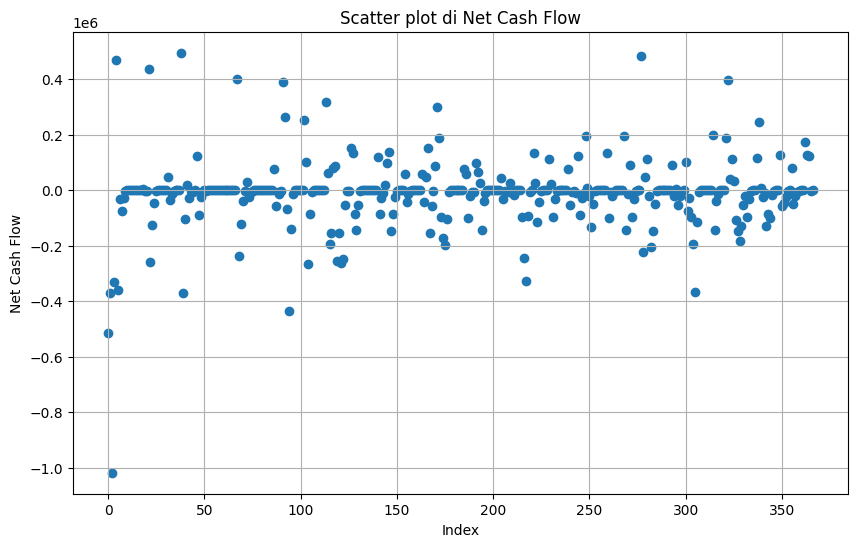

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_copy.index, df_copy['net_cash_flow'])
plt.title('Scatter plot di Net Cash Flow')
plt.xlabel('Index')
plt.ylabel('Net Cash Flow')
plt.grid(True)
plt.show()

In [ ]:
df_copy['cumulative_net_cash_flow'] = df_copy['net_cash_flow'].cumsum()


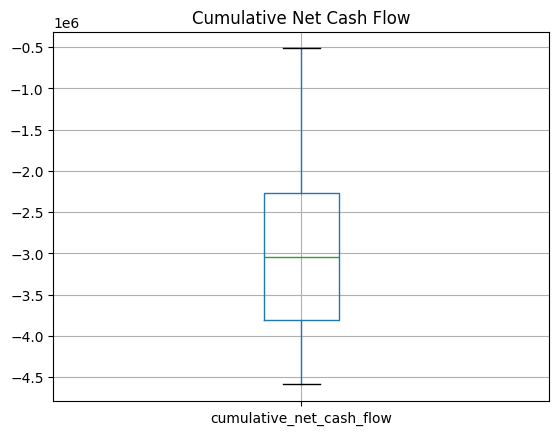

In [ ]:
boxplot = df_copy.boxplot(column=['cumulative_net_cash_flow'])
plt.title("Cumulative Net Cash Flow")
plt.show()

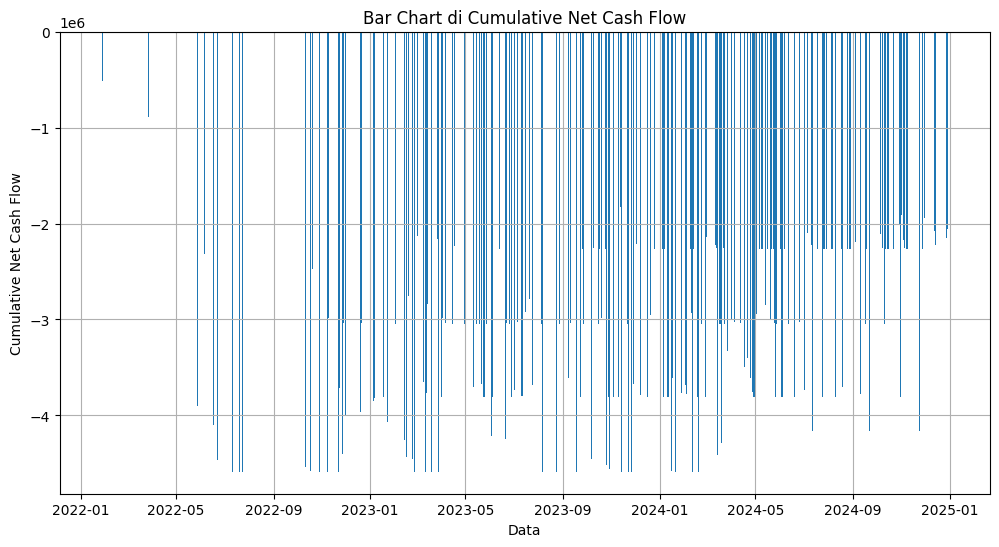

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_copy['date'], df_copy['cumulative_net_cash_flow'])
plt.title('Bar Chart di Cumulative Net Cash Flow')
plt.xlabel('Data')
plt.ylabel('Cumulative Net Cash Flow')
plt.grid(True)
plt.show()

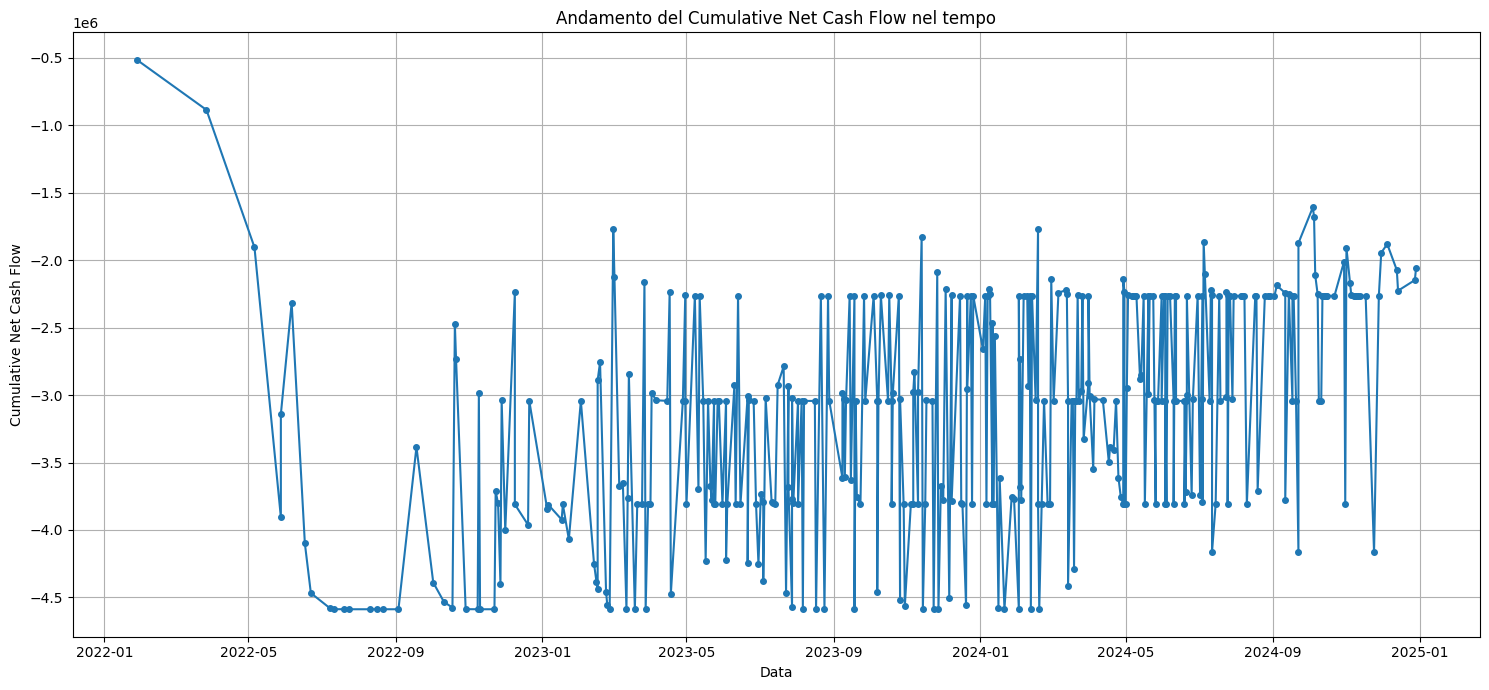

In [ ]:
plt.figure(figsize=(15, 7))
# Sort the DataFrame by date to ensure the line plot is sequential
df_copy_sorted = df_copy.sort_values(by='date')
plt.plot(df_copy_sorted['date'], df_copy_sorted['cumulative_net_cash_flow'], marker='o', linestyle='-', markersize=4)
plt.title('Andamento del Cumulative Net Cash Flow nel tempo')
plt.xlabel('Data')
plt.ylabel('Cumulative Net Cash Flow')
plt.grid(True)
plt.tight_layout()
plt.show()

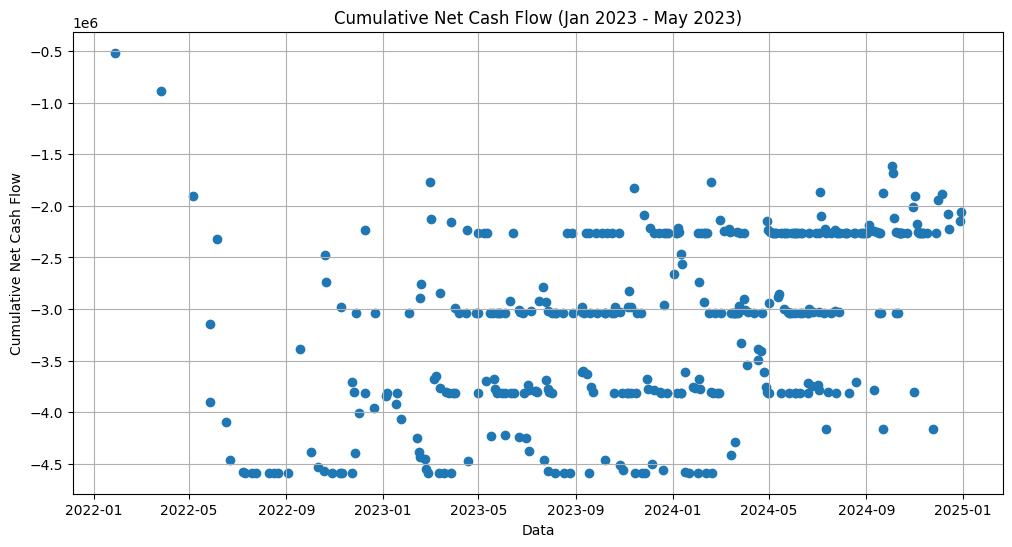

In [ ]:
# Filtra il dataframe per il periodo desiderato
start_date = '2022-01-01'
end_date = '2024-12-31'
df_filtered = df_copy[(df_copy['date'] >= start_date) & (df_copy['date'] <= end_date)].copy()

plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['date'], df_filtered['cumulative_net_cash_flow'])
plt.title('Cumulative Net Cash Flow (Jan 2023 - May 2023)')
plt.xlabel('Data')
plt.ylabel('Cumulative Net Cash Flow')
plt.grid(True)
plt.show()

In [ ]:
# Conta il numero di date duplicate nella colonna 'date' nel dataframe senza duplicati
num_duplicates_after_removal = df_no_duplicates['date'].duplicated().sum()

if num_duplicates_after_removal > 0:
    print(f"Ci sono ancora {num_duplicates_after_removal} date duplicate nella colonna 'date'.")
else:
    print("Non ci sono date duplicate nella colonna 'date' dopo la rimozione.")

Non ci sono date duplicate nella colonna 'date' dopo la rimozione.


# Task
Create a quarterly average of 'cumulative_net_cash_flow' for each year (2022, 2023, and 2024) and visualize these averages using separate line plots, and then provide a summary of the observed trends in financial performance over these years.

## Calculate Quarterly Averages for Each Year

### Subtask:
For each year (2022, 2023, and 2024), calculate the mean of the 'cumulative_net_cash_flow' for every 3-month interval (quarter). This will involve creating a 'quarter' column and then grouping the data to find the average for each quarter.


**Reasoning**:
The first step to calculate quarterly averages is to extract the year and quarter from the 'date' column of the `df_copy` DataFrame. This will create new columns for 'year' and 'quarter' which are necessary for grouping.



In [ ]:
df_copy['year'] = df_copy['date'].dt.year
df_copy['quarter'] = df_copy['date'].dt.quarter

print("DataFrame with 'year' and 'quarter' columns:\n", df_copy.head())

DataFrame with 'year' and 'quarter' columns:
         date project_id  expected_inflow  actual_inflow  expected_outflow  \
0 2022-01-28      pjt_a        802737.88      349937.56        1005735.81   
1 2022-03-27      pjt_a       1274729.00           0.00         569882.94   
2 2022-05-06      pjt_a        818083.50      275585.62        1507023.62   
3 2022-12-09      pjt_a       1207020.38           0.00         512367.62   
4 2023-03-01      pjt_a        544394.88     1314727.50         213769.84   

   actual_outflow  opening_cash  closing_cash  net_cash_flow  \
0       865727.25    2264901.50    1749111.75     -515789.72   
1       371183.62    1749111.75    1377928.12     -371183.62   
2      1293507.12    1377928.12     360006.62    -1017921.44   
3       332375.47     360006.62      27631.17     -332375.47   
4       844744.50      27631.17     497614.19      469983.03   

   net_cash_flow_lag1  rolling_net_7  rolling_outflow_30  \
0                 NaN     -515789.72          

**Reasoning**:
Now that the 'year' and 'quarter' columns have been extracted, I will filter the data for each specified year (2022, 2023, 2024) and calculate the mean of 'cumulative_net_cash_flow' for each quarter, storing the results in separate DataFrames.



In [ ]:
df_2022_quarterly_avg = df_copy[df_copy['year'] == 2022].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2023_quarterly_avg = df_copy[df_copy['year'] == 2023].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2024_quarterly_avg = df_copy[df_copy['year'] == 2024].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()

print("2022 Quarterly Averages:\n", df_2022_quarterly_avg)
print("\n2023 Quarterly Averages:\n", df_2023_quarterly_avg)
print("\n2024 Quarterly Averages:\n", df_2024_quarterly_avg)

2022 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1                -701381.56
1        2               -3305827.75
2        3               -4452822.00
3        4               -3791735.25

2023 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -3703693.25
1        2               -3339791.50
2        3               -3427714.00
3        4               -3281543.25

2024 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -3105053.25
1        2               -2951766.25
2        3               -2708242.75
3        4               -2317544.75


**Reasoning**:
The quarterly averages for each year have been calculated. Now, to visualize these averages, I will create separate line plots for each year (2022, 2023, and 2024), displaying the 'cumulative_net_cash_flow' per quarter.



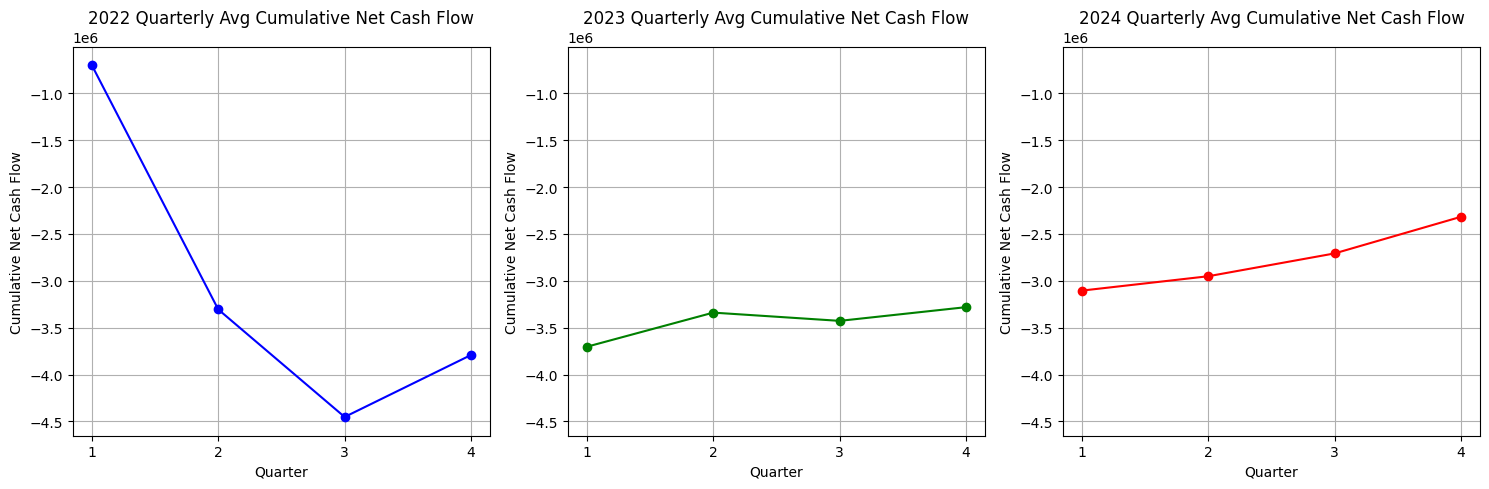

In [ ]:
plt.figure(figsize=(15, 5))

# Determine common y-axis limits
min_y = min(df_2022_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].min()) - 200000 # Add some padding
max_y = max(df_2022_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].max()) + 200000 # Add some padding

# Plot for 2022
plt.subplot(1, 3, 1)
plt.plot(df_2022_quarterly_avg['quarter'], df_2022_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='blue')
plt.title('2022 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2023
plt.subplot(1, 3, 2)
plt.plot(df_2023_quarterly_avg['quarter'], df_2023_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='green')
plt.title('2023 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2024
plt.subplot(1, 3, 3)
plt.plot(df_2024_quarterly_avg['quarter'], df_2024_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='red')
plt.title('2024 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

plt.tight_layout()
plt.show()

### Summary of Observed Trends in Financial Performance (2022-2024)

**2022:** The cumulative net cash flow generally shows a declining trend, starting with a negative average in Q1 and further decreasing significantly in Q2 and Q3, before showing a slight recovery in Q4, though still deeply in negative territory. This indicates a challenging year with substantial net outflows.

**2023:** The trend for 2023 appears more stable compared to 2022. While still negative, the cumulative net cash flow averages fluctuate within a narrower range, suggesting a period of stabilization after the sharp decline in 2022. The values remain consistently negative, but the rate of decrease has slowed, and there isn't a significant improving or worsening trend across the quarters.

**2024:** In 2024, there is a clear and consistent upward trend in the quarterly average cumulative net cash flow. Starting from a negative value in Q1, the averages progressively increase in each subsequent quarter, becoming less negative. This indicates an improving financial performance with reduced net outflows or increased net inflows over the year, moving towards a healthier cash flow position.

## Final Task

### Subtask:
Summarize the observed trends in the quarterly average cumulative net cash flow for each year (2022, 2023, and 2024), providing a concise analysis of the financial performance.


## Summary:

### Q&A
The observed trends in the quarterly average cumulative net cash flow for each year (2022, 2023, and 2024) are as follows:

*   **2022:** The cumulative net cash flow showed a significant declining trend, starting negatively in Q1 (-\$701,381.56) and decreasing further to a low in Q3 (-\$4,452,822.00), with only a slight recovery in Q4 (-\$3,791,735.25). This indicates a challenging year with substantial net outflows.
*   **2023:** The financial performance stabilized, with quarterly average cumulative net cash flow remaining consistently negative but fluctuating within a narrower range (from -\$3,703,693.25 in Q1 to -\$3,281,543.25 in Q4). The rate of decrease seen in 2022 slowed, indicating a period of stabilization without a clear improving or worsening trend.
*   **2024:** A clear and consistent upward trend was observed. The quarterly averages progressively increased, becoming less negative from Q1 (-\$3,105,053.25) to Q4 (-\$2,317,544.75). This signifies an improving financial performance, moving towards a healthier cash flow position by reducing net outflows or increasing net inflows.

### Data Analysis Key Findings
*   In 2022, the quarterly average cumulative net cash flow declined significantly, hitting a low of -\$4,452,822.00 in Q3, indicating a challenging financial year.
*   By 2023, the financial performance stabilized, with cumulative net cash flow remaining negative but within a tighter range, from -\$3,703,693.25 in Q1 to -\$3,281,543.25 in Q4.
*   2024 demonstrated a clear positive trend, with the quarterly average cumulative net cash flow consistently improving from -\$3,105,053.25 in Q1 to -\$2,317,544.75 in Q4, signaling a recovery in financial health.

### Insights or Next Steps
*   The company has successfully reversed the negative trend observed in 2022 and stabilized in 2023, showing significant improvement in cumulative net cash flow in 2024.
*   Further analysis should investigate the specific operational changes or market conditions that contributed to the positive shift in cash flow during 2024 to reinforce these strategies.


DATASET 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#per visualizzare due cifre
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df = pd.read_csv("target_company.csv")
print("Dimensione dataset \n", df.shape, "\n")

Dimensione dataset 
 (253, 12) 



In [ ]:
print("Parte iniziale del dataset \n",df.head(21), "\n")

Parte iniziale del dataset 
           date project_id  expected_inflow  actual_inflow  expected_outflow  \
0   2022-01-28      PJT_A             0.00           0.00         838282.54   
1   2022-12-09      PJT_A        822187.01      240231.16         871482.74   
2   2022-12-29      PJT_A        737472.93           0.00        1292408.68   
3   2023-03-01      PJT_A        699080.98      770949.48         553737.66   
4   2023-03-02      PJT_A             0.00           0.00         700796.44   
5   2023-03-27      PJT_A             0.00           0.00         172374.11   
6   2023-04-17      PJT_A        450731.50           0.00         203294.86   
7   2023-04-30      PJT_A        704465.57      681310.13         148856.79   
8   2023-05-08      PJT_A        310842.72       64364.22         664719.68   
9   2023-05-12      PJT_A             0.00           0.00              0.00   
10  2023-06-13      PJT_A        387431.97      638854.35         536230.56   
11  2023-08-21      PJT

In [ ]:
df.describe()

,expected_inflow,actual_inflow,expected_outflow,actual_outflow,opening_cash,closing_cash,net_cash_flow,net_cash_flow_lag1,rolling_net_7,rolling_outflow_30
count,253.00,253.00,253.00,253.00,253.00,253.00,253.00,250.00,253.00,253.00
mean,175592.45,90357.26,231195.49,102555.95,85148.00,72949.31,-12198.69,-12280.01,-22632.47,128085.35
std,229887.80,190565.15,212757.11,180275.36,208081.45,161044.21,133810.60,133785.30,103824.04,122726.92
min,0.00,0.00,0.00,0.00,0.00,0.00,-861900.00,-861900.00,-837822.80,2151.59
25%,0.00,0.00,74907.51,0.89,0.48,0.36,-8176.30,-8126.79,-8891.38,60361.07
50%,76698.52,0.00,181013.48,5197.77,568.06,462.89,-14.66,-16.85,-1.96,101259.61
75%,259053.99,82481.38,338381.42,136993.09,57326.52,48238.75,0.00,0.00,2749.12,133399.23
max,822187.01,1201370.99,1292408.68,1102131.16,2014901.42,1201155.82,476107.39,476107.39,109325.02,957938.38


In [ ]:
df_copy=df.copy()

In [ ]:
print("Informazioni generali \n")
print(df_copy.info())

Informazioni generali 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                253 non-null    object 
 1   project_id          253 non-null    object 
 2   expected_inflow     253 non-null    float64
 3   actual_inflow       253 non-null    float64
 4   expected_outflow    253 non-null    float64
 5   actual_outflow      253 non-null    float64
 6   opening_cash        253 non-null    float64
 7   closing_cash        253 non-null    float64
 8   net_cash_flow       253 non-null    float64
 9   net_cash_flow_lag1  250 non-null    float64
 10  rolling_net_7       253 non-null    float64
 11  rolling_outflow_30  253 non-null    float64
dtypes: float64(10), object(2)
memory usage: 23.8+ KB
None


In [ ]:
# Seleziona le colonne con dtype float64
float64_cols = df_copy.select_dtypes(include=['float64']).columns

# Cambia il dtype delle colonne selezionate a float32
df_copy[float64_cols] = df_copy[float64_cols].astype('float32')

# Verifica i tipi di dato aggiornati
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                253 non-null    object 
 1   project_id          253 non-null    object 
 2   expected_inflow     253 non-null    float32
 3   actual_inflow       253 non-null    float32
 4   expected_outflow    253 non-null    float32
 5   actual_outflow      253 non-null    float32
 6   opening_cash        253 non-null    float32
 7   closing_cash        253 non-null    float32
 8   net_cash_flow       253 non-null    float32
 9   net_cash_flow_lag1  250 non-null    float32
 10  rolling_net_7       253 non-null    float32
 11  rolling_outflow_30  253 non-null    float32
dtypes: float32(10), object(2)
memory usage: 14.0+ KB
None


In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')

In [ ]:
df_copy['project_id'] = df_copy['project_id'].astype('string').str.lower().astype('category')

In [ ]:
print("Colonne presenti nel dataset \n", df_copy.columns)
print("\n Tipo di ogni colonnea: \n", df_copy.dtypes)

Colonne presenti nel dataset 
 Index(['date', 'project_id', 'expected_inflow', 'actual_inflow',
       'expected_outflow', 'actual_outflow', 'opening_cash', 'closing_cash',
       'net_cash_flow', 'net_cash_flow_lag1', 'rolling_net_7',
       'rolling_outflow_30'],
      dtype='object')

 Tipo di ogni colonnea: 
 date                  datetime64[ns]
project_id                  category
expected_inflow              float32
actual_inflow                float32
expected_outflow             float32
actual_outflow               float32
opening_cash                 float32
closing_cash                 float32
net_cash_flow                float32
net_cash_flow_lag1           float32
rolling_net_7                float32
rolling_outflow_30           float32
dtype: object


In [ ]:
# Before optimization
original_memory = df.memory_usage(deep=True).sum()

# After optimizing columns (category, float32, datetime, etc.)
optimized_memory = df_copy.memory_usage(deep=True).sum()

# Print comparison
print(f"Original: {original_memory / 1024**2:.2f} MB")
print(f"Optimized: {optimized_memory / 1024**2:.2f} MB")
print(f"Reduction: {((original_memory - optimized_memory) / original_memory) * 100:.2f}%")

Original: 0.05 MB
Optimized: 0.01 MB
Reduction: 73.86%


In [ ]:
print("Valori nulli presenti \n", df_copy.isnull().sum())

Valori nulli presenti 
 date                  0
project_id            0
expected_inflow       0
actual_inflow         0
expected_outflow      0
actual_outflow        0
opening_cash          0
closing_cash          0
net_cash_flow         0
net_cash_flow_lag1    3
rolling_net_7         0
rolling_outflow_30    0
dtype: int64


In [ ]:
# Conta il numero di date duplicate nella colonna 'date'
num_duplicates = df_copy['date'].duplicated().sum()

if num_duplicates > 0:
    print(f"Ci sono {num_duplicates} date duplicate nella colonna 'date'.")
    # Puoi anche visualizzare le righe duplicate se necessario
    # display(df_copy[df_copy.duplicated(subset=['date'], keep=False)])
else:
    print("Non ci sono date duplicate nella colonna 'date'.")

Ci sono 10 date duplicate nella colonna 'date'.


In [ ]:
# Rimuovi i duplicati basandoti sulla colonna 'date'
df_no_duplicates = df_copy.drop_duplicates(subset=['date'], keep='first')

# Verifica la nuova dimensione del dataframe
print("Dimensione dataframe dopo la rimozione dei duplicati:", df_no_duplicates.shape)

Dimensione dataframe dopo la rimozione dei duplicati: (243, 12)


In [ ]:
df_copy['cumulative_net_cash_flow'] = df_copy['net_cash_flow'].cumsum()


In [ ]:
df_copy['year'] = df_copy['date'].dt.year
df_copy['quarter'] = df_copy['date'].dt.quarter

print("DataFrame with 'year' and 'quarter' columns:\n", df_copy.head())

DataFrame with 'year' and 'quarter' columns:
         date project_id  expected_inflow  actual_inflow  expected_outflow  \
0 2022-01-28      pjt_a             0.00           0.00         838282.56   
1 2022-12-09      pjt_a        822187.00      240231.16         871482.75   
2 2022-12-29      pjt_a        737472.94           0.00        1292408.62   
3 2023-03-01      pjt_a        699081.00      770949.50         553737.69   
4 2023-03-02      pjt_a             0.00           0.00         700796.44   

   actual_outflow  opening_cash  closing_cash  net_cash_flow  \
0       813745.62    2014901.38    1201155.88     -813745.62   
1      1102131.12    1201155.88     339255.81     -861900.00   
2       311987.19     339255.81      27268.62     -311987.19   
3       795755.94      27268.62       2462.17      -24806.45   
4         2280.39       2462.17        181.78       -2280.39   

   net_cash_flow_lag1  rolling_net_7  rolling_outflow_30  \
0                 NaN     -813745.62          

In [ ]:
df_2022_quarterly_avg = df_copy[df_copy['year'] == 2022].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2023_quarterly_avg = df_copy[df_copy['year'] == 2023].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2024_quarterly_avg = df_copy[df_copy['year'] == 2024].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()

print("2022 Quarterly Averages:\n", df_2022_quarterly_avg)
print("\n2023 Quarterly Averages:\n", df_2023_quarterly_avg)
print("\n2024 Quarterly Averages:\n", df_2024_quarterly_avg)

2022 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -1761837.25
1        2               -2852502.75
2        3               -2909908.00
3        4               -2764661.00

2023 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -2740380.00
1        2               -2711829.00
2        3               -2660676.25
3        4               -2444965.25

2024 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -2152308.75
1        2               -2011331.38
2        3               -1930142.62
3        4               -2025654.88


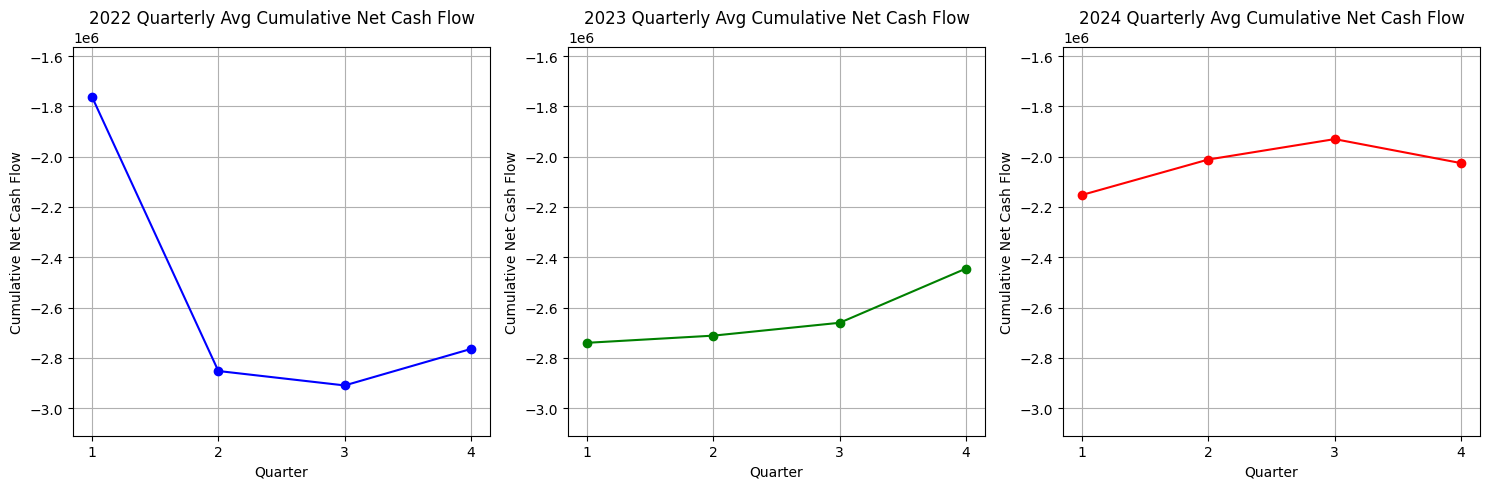

In [ ]:
plt.figure(figsize=(15, 5))

# Determine common y-axis limits
min_y = min(df_2022_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].min()) - 200000 # Add some padding
max_y = max(df_2022_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].max()) + 200000 # Add some padding

# Plot for 2022
plt.subplot(1, 3, 1)
plt.plot(df_2022_quarterly_avg['quarter'], df_2022_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='blue')
plt.title('2022 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2023
plt.subplot(1, 3, 2)
plt.plot(df_2023_quarterly_avg['quarter'], df_2023_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='green')
plt.title('2023 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2024
plt.subplot(1, 3, 3)
plt.plot(df_2024_quarterly_avg['quarter'], df_2024_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='red')
plt.title('2024 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

plt.tight_layout()
plt.show()

DATASET 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#per visualizzare due cifre
pd.options.display.float_format = "{:.2f}".format

In [4]:
df = pd.read_csv("competitor2.csv")
print("Dimensione dataset \n", df.shape, "\n")

Dimensione dataset 
 (552, 12) 



In [5]:
print("Parte iniziale del dataset \n",df.head(21), "\n")

Parte iniziale del dataset 
           date project_id  expected_inflow  actual_inflow  expected_outflow  \
0   2022-01-28      PJT_A             0.00           0.00         794162.41   
1   2022-10-08      PJT_A        790153.75      248796.91         825615.23   
2   2022-11-19      PJT_A        708740.22           0.00        1224387.17   
3   2022-12-29      PJT_A             0.00           0.00        1125699.16   
4   2023-01-02      PJT_A        622653.50           0.00              0.00   
5   2023-01-22      PJT_A             0.00      716389.68         172374.11   
6   2023-02-10      PJT_A        450731.50       49074.61         449353.19   
7   2023-02-25      PJT_A        234685.48        8998.09         184019.55   
8   2023-03-11      PJT_A             0.00           0.00         347537.15   
9   2023-03-28      PJT_A             0.00           0.00              0.00   
10  2023-04-15      PJT_A        565605.48           0.00         529789.24   
11  2023-04-30      PJT

In [6]:
df.describe()

,expected_inflow,actual_inflow,expected_outflow,actual_outflow,opening_cash,closing_cash,net_cash_flow,net_cash_flow_lag1,rolling_net_7,rolling_outflow_30
count,552.00,552.00,552.00,552.00,552.00,552.00,552.00,546.00,552.00,552.00
mean,184090.74,94803.03,247726.74,107860.26,128255.89,115198.66,-13057.23,-13116.71,-18799.63,123128.25
std,233998.68,231471.19,222876.41,181945.33,288176.53,254513.27,168216.30,168956.44,93166.69,99824.07
min,0.00,0.00,0.00,0.00,0.00,0.00,-910689.57,-910689.57,-831774.50,0.00
25%,0.00,0.00,80618.42,8.96,0.76,0.76,-26665.40,-24967.16,-14330.47,62314.25
50%,85661.42,0.00,181515.76,11128.42,1166.76,1047.31,-102.79,-89.40,0.00,90293.40
75%,296118.83,69771.88,360128.42,140794.88,108337.14,94114.23,0.00,0.00,4006.72,156512.30
max,899671.62,1932364.55,1224387.17,1159330.01,2261817.36,2259788.07,952581.51,952581.51,199959.67,956172.95


In [7]:
df_copy=df.copy()

In [8]:
print("Informazioni generali \n")
print(df_copy.info())

Informazioni generali 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                552 non-null    object 
 1   project_id          552 non-null    object 
 2   expected_inflow     552 non-null    float64
 3   actual_inflow       552 non-null    float64
 4   expected_outflow    552 non-null    float64
 5   actual_outflow      552 non-null    float64
 6   opening_cash        552 non-null    float64
 7   closing_cash        552 non-null    float64
 8   net_cash_flow       552 non-null    float64
 9   net_cash_flow_lag1  546 non-null    float64
 10  rolling_net_7       552 non-null    float64
 11  rolling_outflow_30  552 non-null    float64
dtypes: float64(10), object(2)
memory usage: 51.9+ KB
None


In [9]:
# Seleziona le colonne con dtype float64
float64_cols = df_copy.select_dtypes(include=['float64']).columns

# Cambia il dtype delle colonne selezionate a float32
df_copy[float64_cols] = df_copy[float64_cols].astype('float32')

# Verifica i tipi di dato aggiornati
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                552 non-null    object 
 1   project_id          552 non-null    object 
 2   expected_inflow     552 non-null    float32
 3   actual_inflow       552 non-null    float32
 4   expected_outflow    552 non-null    float32
 5   actual_outflow      552 non-null    float32
 6   opening_cash        552 non-null    float32
 7   closing_cash        552 non-null    float32
 8   net_cash_flow       552 non-null    float32
 9   net_cash_flow_lag1  546 non-null    float32
 10  rolling_net_7       552 non-null    float32
 11  rolling_outflow_30  552 non-null    float32
dtypes: float32(10), object(2)
memory usage: 30.3+ KB
None


In [10]:
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')

In [11]:
df_copy['project_id'] = df_copy['project_id'].astype('string').str.lower().astype('category')

In [12]:
print("Colonne presenti nel dataset \n", df_copy.columns)
print("\n Tipo di ogni colonnea: \n", df_copy.dtypes)

Colonne presenti nel dataset 
 Index(['date', 'project_id', 'expected_inflow', 'actual_inflow',
       'expected_outflow', 'actual_outflow', 'opening_cash', 'closing_cash',
       'net_cash_flow', 'net_cash_flow_lag1', 'rolling_net_7',
       'rolling_outflow_30'],
      dtype='object')

 Tipo di ogni colonnea: 
 date                  datetime64[ns]
project_id                  category
expected_inflow              float32
actual_inflow                float32
expected_outflow             float32
actual_outflow               float32
opening_cash                 float32
closing_cash                 float32
net_cash_flow                float32
net_cash_flow_lag1           float32
rolling_net_7                float32
rolling_outflow_30           float32
dtype: object


In [13]:
# Before optimization
original_memory = df.memory_usage(deep=True).sum()

# After optimizing columns (category, float32, datetime, etc.)
optimized_memory = df_copy.memory_usage(deep=True).sum()

# Print comparison
print(f"Original: {original_memory / 1024**2:.2f} MB")
print(f"Optimized: {optimized_memory / 1024**2:.2f} MB")
print(f"Reduction: {((original_memory - optimized_memory) / original_memory) * 100:.2f}%")

Original: 0.10 MB
Optimized: 0.03 MB
Reduction: 74.05%


In [14]:
print("Valori nulli presenti \n", df_copy.isnull().sum())

Valori nulli presenti 
 date                  0
project_id            0
expected_inflow       0
actual_inflow         0
expected_outflow      0
actual_outflow        0
opening_cash          0
closing_cash          0
net_cash_flow         0
net_cash_flow_lag1    6
rolling_net_7         0
rolling_outflow_30    0
dtype: int64


In [15]:
# Conta il numero di date duplicate nella colonna 'date'
num_duplicates = df_copy['date'].duplicated().sum()

if num_duplicates > 0:
    print(f"Ci sono {num_duplicates} date duplicate nella colonna 'date'.")
    # Puoi anche visualizzare le righe duplicate se necessario
    # display(df_copy[df_copy.duplicated(subset=['date'], keep=False)])
else:
    print("Non ci sono date duplicate nella colonna 'date'.")

Ci sono 120 date duplicate nella colonna 'date'.


In [16]:
# Rimuovi i duplicati basandoti sulla colonna 'date'
df_no_duplicates = df_copy.drop_duplicates(subset=['date'], keep='first')

# Verifica la nuova dimensione del dataframe
print("Dimensione dataframe dopo la rimozione dei duplicati:", df_no_duplicates.shape)

Dimensione dataframe dopo la rimozione dei duplicati: (432, 12)


In [17]:
df_copy['cumulative_net_cash_flow'] = df_copy['net_cash_flow'].cumsum()


In [18]:
df_copy['year'] = df_copy['date'].dt.year
df_copy['quarter'] = df_copy['date'].dt.quarter

print("DataFrame with 'year' and 'quarter' columns:\n", df_copy.head())

DataFrame with 'year' and 'quarter' columns:
         date project_id  expected_inflow  actual_inflow  expected_outflow  \
0 2022-01-28      pjt_a             0.00           0.00         794162.44   
1 2022-10-08      pjt_a        790153.75      248796.91         825615.25   
2 2022-11-19      pjt_a        708740.25           0.00        1224387.12   
3 2022-12-29      pjt_a             0.00           0.00        1125699.12   
4 2023-01-02      pjt_a        622653.50           0.00              0.00   

   actual_outflow  opening_cash  closing_cash  net_cash_flow  \
0       770916.88    2014901.38    1243984.50     -770916.88   
1      1141429.00    1243984.50     351352.41     -892632.12   
2       323111.50     351352.41      28240.92     -323111.50   
3        26704.77      28240.92       1536.15      -26704.77   
4         1384.45       1536.15        151.70       -1384.45   

   net_cash_flow_lag1  rolling_net_7  rolling_outflow_30  \
0                 NaN     -770916.88          

In [19]:
df_2022_quarterly_avg = df_copy[df_copy['year'] == 2022].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2023_quarterly_avg = df_copy[df_copy['year'] == 2023].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2024_quarterly_avg = df_copy[df_copy['year'] == 2024].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()

print("2022 Quarterly Averages:\n", df_2022_quarterly_avg)
print("\n2023 Quarterly Averages:\n", df_2023_quarterly_avg)
print("\n2024 Quarterly Averages:\n", df_2024_quarterly_avg)

2022 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -4160930.75
1        2               -5922084.50
2        3               -6478174.50
3        4               -5729822.50

2023 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -5579601.50
1        2               -5593103.50
2        3               -5257511.50
3        4               -4665844.50

2024 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -4694566.50
1        2               -4100864.75
2        3               -3834355.75
3        4               -3778178.50


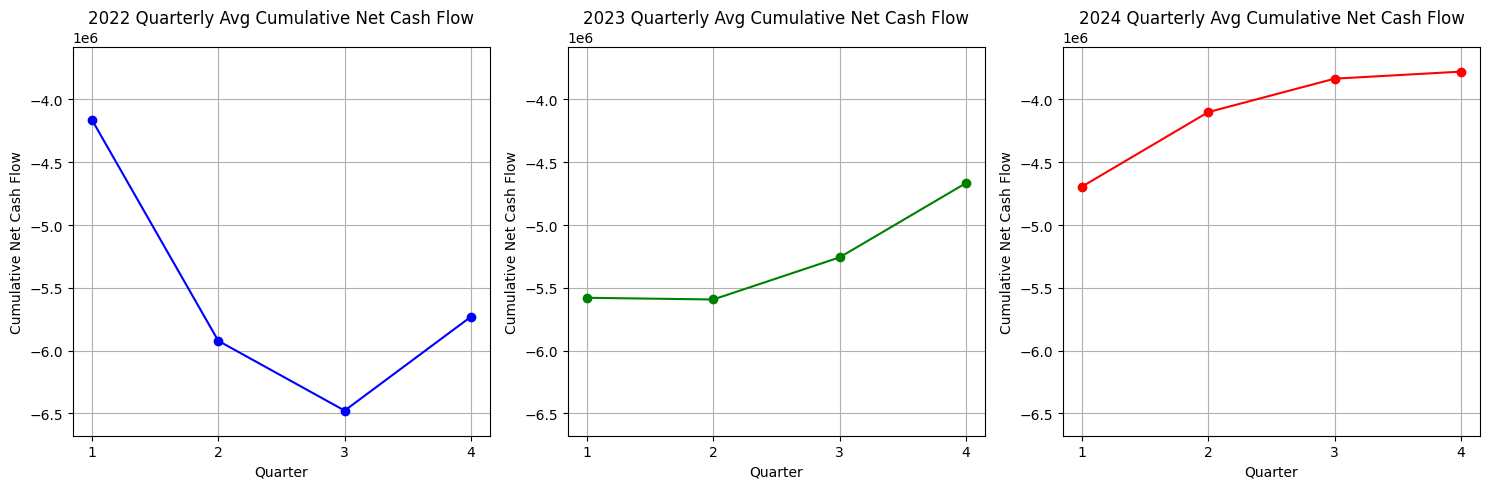

In [20]:
plt.figure(figsize=(15, 5))

# Determine common y-axis limits
min_y = min(df_2022_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].min()) - 200000 # Add some padding
max_y = max(df_2022_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].max()) + 200000 # Add some padding

# Plot for 2022
plt.subplot(1, 3, 1)
plt.plot(df_2022_quarterly_avg['quarter'], df_2022_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='blue')
plt.title('2022 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2023
plt.subplot(1, 3, 2)
plt.plot(df_2023_quarterly_avg['quarter'], df_2023_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='green')
plt.title('2023 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2024
plt.subplot(1, 3, 3)
plt.plot(df_2024_quarterly_avg['quarter'], df_2024_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='red')
plt.title('2024 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

plt.tight_layout()
plt.show()